In [1]:
import torch 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

from model import EyeClassifierCNN

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 
import random

In [3]:
seed = 69  # Choose any fixed number
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)  # If using GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [5]:
dataset = datasets.ImageFolder(root="processed_dataset/", transform=transform)

total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
dataset.class_to_idx

{'eye': 0, 'not_eye': 1}

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
device

device(type='cuda')

In [9]:
def get_num_correcct(preds, labels):
    sum = 0 
    for i in range(len(preds)):
        if preds[i].item() == labels[i].item():
            sum += 1
    return sum
        

In [10]:
def model_train(model, optimizer, criterion, dataloader):
    model.train()
    actual = []
    predicted = []
    for batch in dataloader:
        images, labels = batch
        labels = labels.to(device)
        images = images.to(device)
        labels = labels.unsqueeze(1).float()
        
        preds = model(images)
        loss = criterion(preds, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        for label in labels: actual.append(int(label.item()))
        for pred in preds: predicted.append(int(pred.item())) 
            
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    return actual, predicted


In [11]:
def model_eval(model, criterion, dataloader):
    model.eval()
    actual = []
    predicted = []
    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            labels = labels.to(device)
            images = images.to(device)
            labels = labels.unsqueeze(1).float()
            
            preds = model(images)
            
            for label in labels: actual.append(int(label.item()))
            for pred in preds: predicted.append(int(pred.item())) 
            
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    return actual, predicted

In [12]:
def create_confusion_matrix(actual,predicted, epoch):
    
    cm = confusion_matrix(actual,predicted)
    
    sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Eye','Not Eye'],
            yticklabels=['Eye','Not Eye'])
    plt.ylabel('Actual', fontsize=13)
    plt.title(f'Eval Confusion Matrix - Epoch #{epoch+1}', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()

In [13]:
model = EyeClassifierCNN().to(device) 

criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0007)

Epoch #1 
Training: 
               precision    recall  f1-score   support

           0       0.66      0.83      0.74      1479
           1       0.86      0.71      0.78      2185

    accuracy                           0.76      3664
   macro avg       0.76      0.77      0.76      3664
weighted avg       0.78      0.76      0.76      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       156
           1       0.92      0.90      0.91       302

    accuracy                           0.88       458
   macro avg       0.87      0.88      0.87       458
weighted avg       0.89      0.88      0.89       458



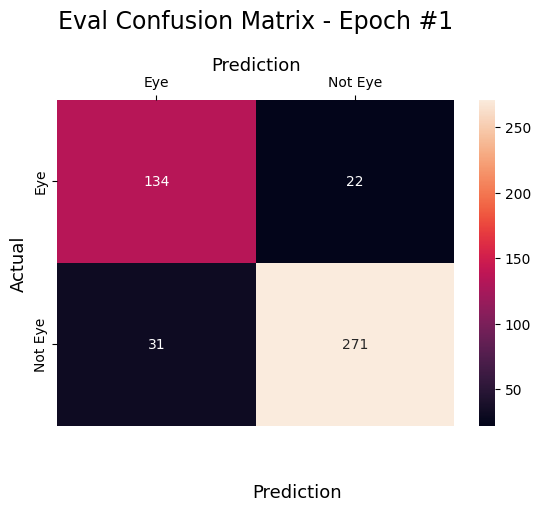

Epoch #2 
Training: 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      1479
           1       0.89      0.82      0.86      2185

    accuracy                           0.84      3664
   macro avg       0.83      0.84      0.83      3664
weighted avg       0.84      0.84      0.84      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       156
           1       0.98      0.88      0.93       302

    accuracy                           0.91       458
   macro avg       0.89      0.92      0.90       458
weighted avg       0.92      0.91      0.91       458



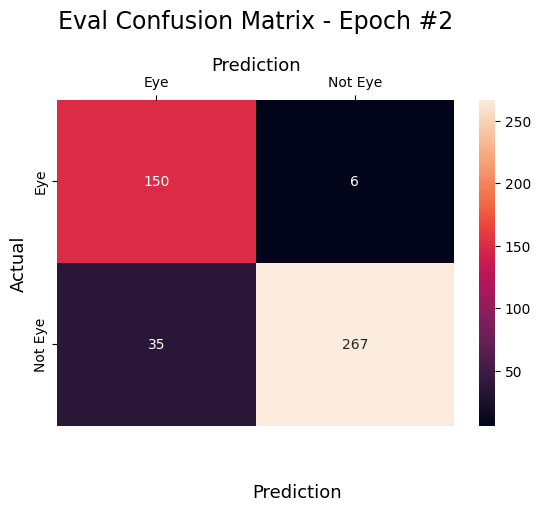

Epoch #3 
Training: 
               precision    recall  f1-score   support

           0       0.73      0.85      0.79      1479
           1       0.89      0.79      0.84      2185

    accuracy                           0.82      3664
   macro avg       0.81      0.82      0.81      3664
weighted avg       0.82      0.82      0.82      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       156
           1       0.96      0.93      0.94       302

    accuracy                           0.92       458
   macro avg       0.91      0.92      0.92       458
weighted avg       0.93      0.92      0.92       458



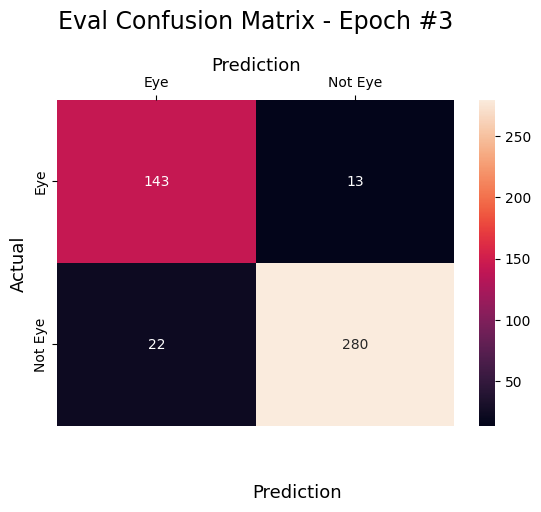

Epoch #4 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1479
           1       0.91      0.92      0.91      2185

    accuracy                           0.90      3664
   macro avg       0.89      0.89      0.89      3664
weighted avg       0.89      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       156
           1       0.94      0.91      0.93       302

    accuracy                           0.90       458
   macro avg       0.89      0.90      0.89       458
weighted avg       0.91      0.90      0.90       458



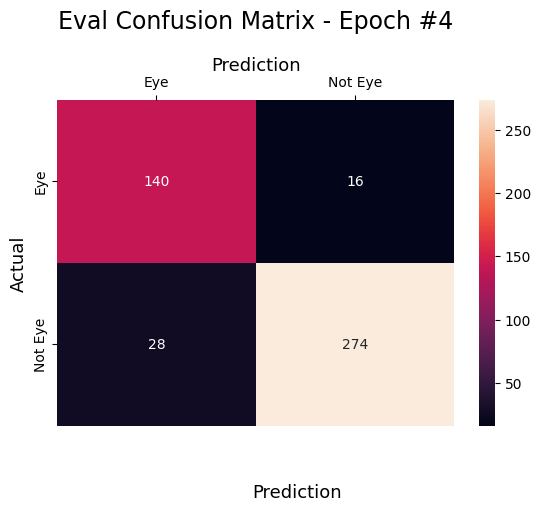

Epoch #5 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1479
           1       0.91      0.93      0.92      2185

    accuracy                           0.90      3664
   macro avg       0.90      0.90      0.90      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       156
           1       0.97      0.87      0.92       302

    accuracy                           0.90       458
   macro avg       0.88      0.91      0.89       458
weighted avg       0.91      0.90      0.90       458



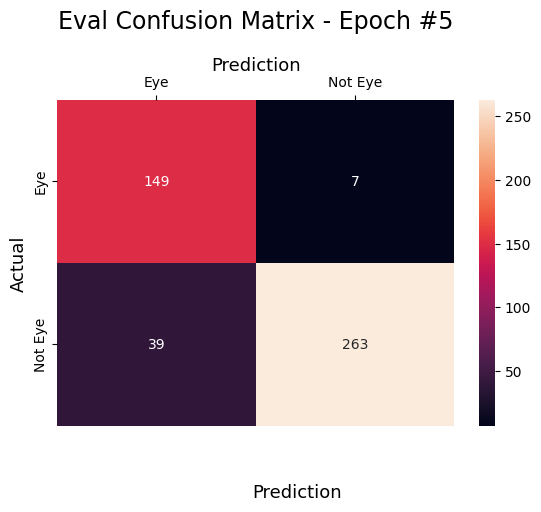

Epoch #6 
Training: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1479
           1       0.93      0.90      0.92      2185

    accuracy                           0.90      3664
   macro avg       0.90      0.90      0.90      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.73      0.97      0.84       156
           1       0.98      0.81      0.89       302

    accuracy                           0.87       458
   macro avg       0.86      0.89      0.86       458
weighted avg       0.90      0.87      0.87       458



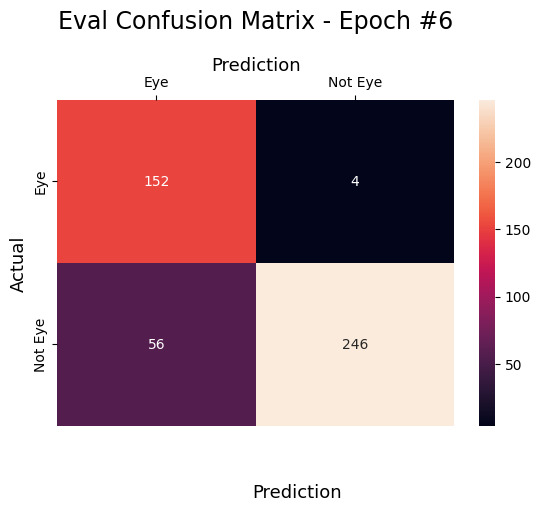

Epoch #7 
Training: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      1479
           1       0.96      0.85      0.90      2185

    accuracy                           0.89      3664
   macro avg       0.89      0.90      0.89      3664
weighted avg       0.90      0.89      0.89      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.70      0.98      0.82       156
           1       0.99      0.78      0.87       302

    accuracy                           0.85       458
   macro avg       0.84      0.88      0.85       458
weighted avg       0.89      0.85      0.86       458



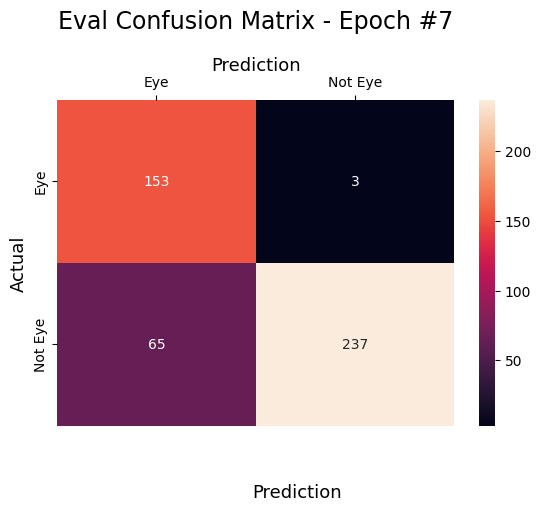

Epoch #8 
Training: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1479
           1       0.95      0.87      0.91      2185

    accuracy                           0.90      3664
   macro avg       0.89      0.90      0.89      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       156
           1       0.97      0.92      0.95       302

    accuracy                           0.93       458
   macro avg       0.92      0.93      0.92       458
weighted avg       0.93      0.93      0.93       458



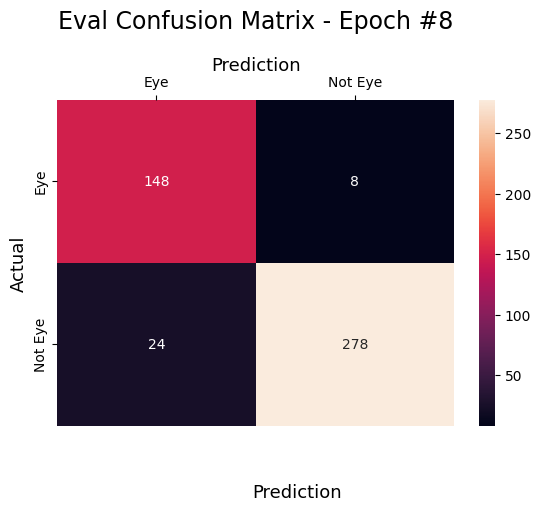

Epoch #9 
Training: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1479
           1       0.96      0.90      0.93      2185

    accuracy                           0.92      3664
   macro avg       0.91      0.92      0.92      3664
weighted avg       0.92      0.92      0.92      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       156
           1       0.98      0.96      0.97       302

    accuracy                           0.96       458
   macro avg       0.95      0.96      0.95       458
weighted avg       0.96      0.96      0.96       458



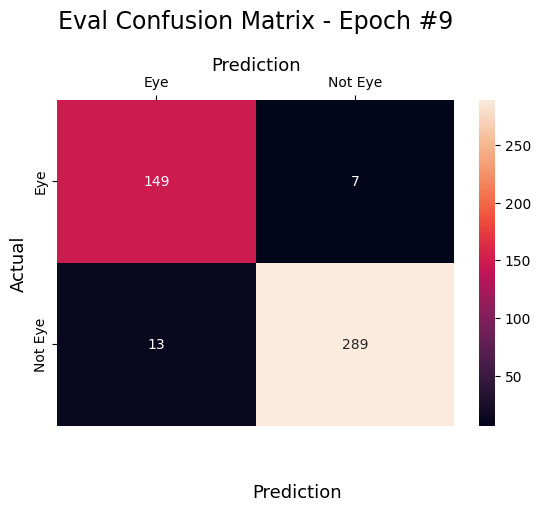

Epoch #10 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1479
           1       0.96      0.93      0.95      2185

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       156
           1       0.99      0.91      0.94       302

    accuracy                           0.93       458
   macro avg       0.92      0.94      0.92       458
weighted avg       0.94      0.93      0.93       458



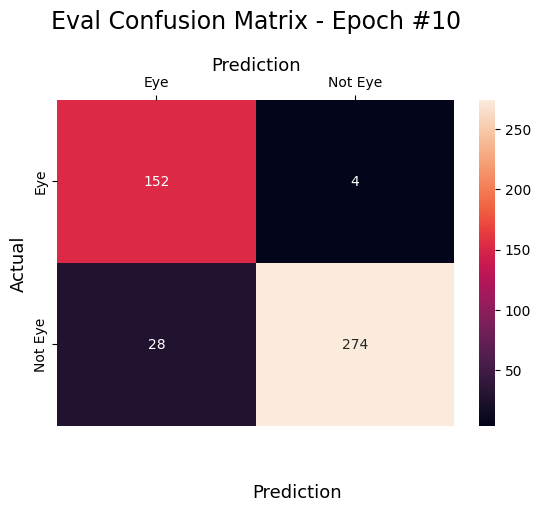

Epoch #11 
Training: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1479
           1       0.95      0.92      0.94      2185

    accuracy                           0.93      3664
   macro avg       0.92      0.93      0.93      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       156
           1       0.98      0.91      0.94       302

    accuracy                           0.93       458
   macro avg       0.91      0.94      0.92       458
weighted avg       0.93      0.93      0.93       458



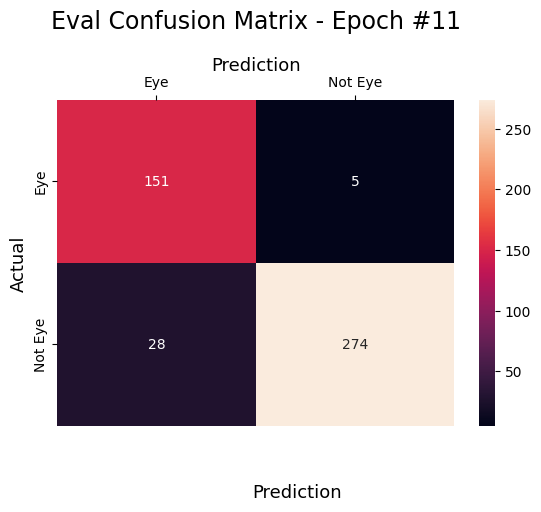

Epoch #12 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1479
           1       0.95      0.91      0.93      2185

    accuracy                           0.92      3664
   macro avg       0.92      0.92      0.92      3664
weighted avg       0.92      0.92      0.92      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       156
           1       0.99      0.91      0.94       302

    accuracy                           0.93       458
   macro avg       0.92      0.94      0.92       458
weighted avg       0.94      0.93      0.93       458



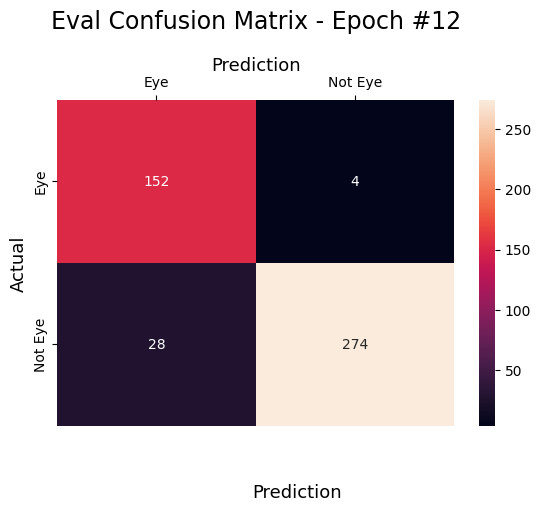

Epoch #13 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1479
           1       0.92      0.94      0.93      2185

    accuracy                           0.91      3664
   macro avg       0.91      0.91      0.91      3664
weighted avg       0.91      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       156
           1       0.96      0.82      0.88       302

    accuracy                           0.86       458
   macro avg       0.84      0.87      0.85       458
weighted avg       0.88      0.86      0.86       458



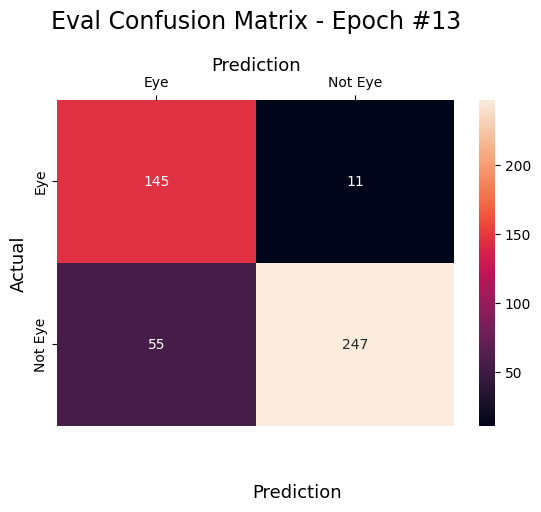

Epoch #14 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1479
           1       0.93      0.92      0.93      2185

    accuracy                           0.91      3664
   macro avg       0.91      0.91      0.91      3664
weighted avg       0.91      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.78      0.84       156
           1       0.89      0.96      0.93       302

    accuracy                           0.90       458
   macro avg       0.90      0.87      0.88       458
weighted avg       0.90      0.90      0.90       458



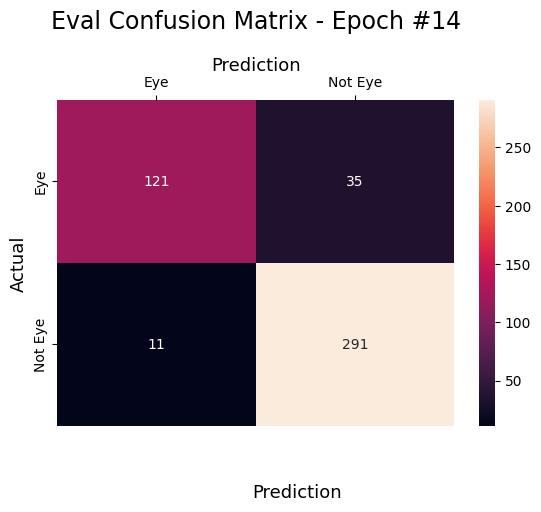

Epoch #15 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1479
           1       0.87      0.94      0.91      2185

    accuracy                           0.88      3664
   macro avg       0.89      0.87      0.87      3664
weighted avg       0.88      0.88      0.88      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       156
           1       0.89      0.95      0.92       302

    accuracy                           0.89       458
   macro avg       0.89      0.86      0.87       458
weighted avg       0.89      0.89      0.89       458



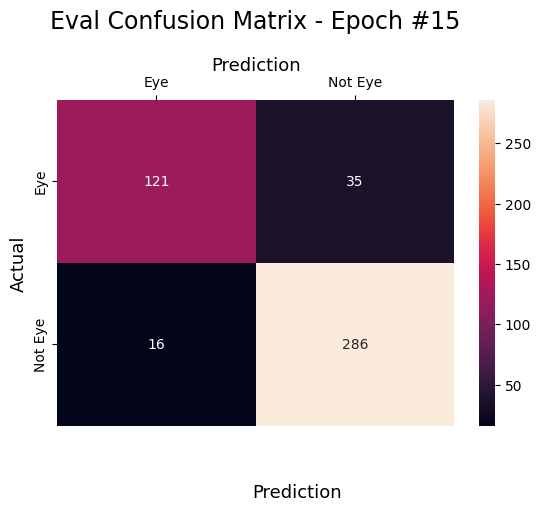

Epoch #16 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1479
           1       0.88      0.92      0.90      2185

    accuracy                           0.88      3664
   macro avg       0.88      0.87      0.87      3664
weighted avg       0.88      0.88      0.88      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       156
           1       0.98      0.91      0.94       302

    accuracy                           0.93       458
   macro avg       0.91      0.93      0.92       458
weighted avg       0.93      0.93      0.93       458



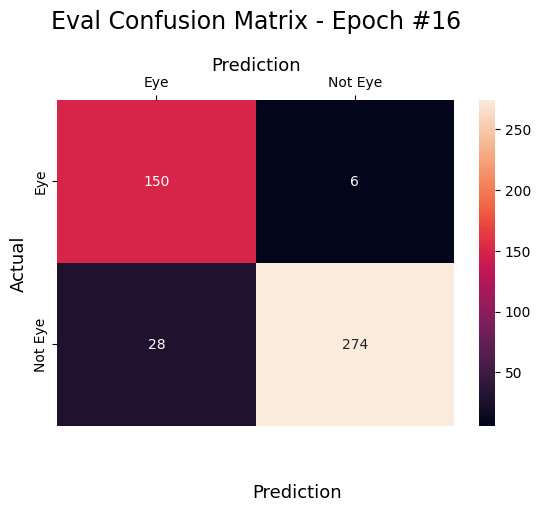

Epoch #17 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1479
           1       0.95      0.93      0.94      2185

    accuracy                           0.92      3664
   macro avg       0.92      0.92      0.92      3664
weighted avg       0.93      0.92      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       156
           1       0.97      0.93      0.95       302

    accuracy                           0.94       458
   macro avg       0.93      0.94      0.93       458
weighted avg       0.94      0.94      0.94       458



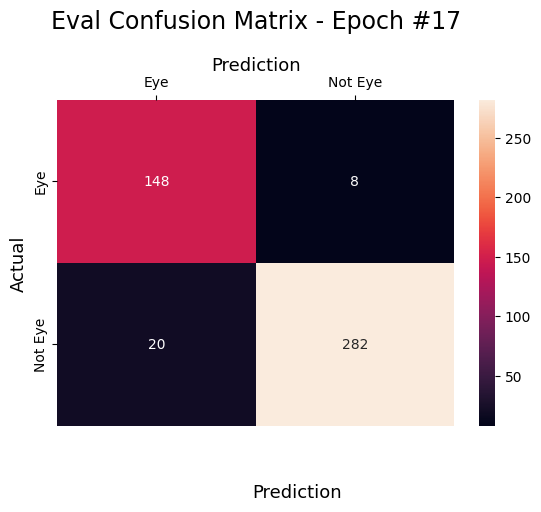

Epoch #18 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1479
           1       0.95      0.94      0.94      2185

    accuracy                           0.93      3664
   macro avg       0.93      0.93      0.93      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       156
           1       0.97      0.95      0.96       302

    accuracy                           0.95       458
   macro avg       0.94      0.95      0.94       458
weighted avg       0.95      0.95      0.95       458



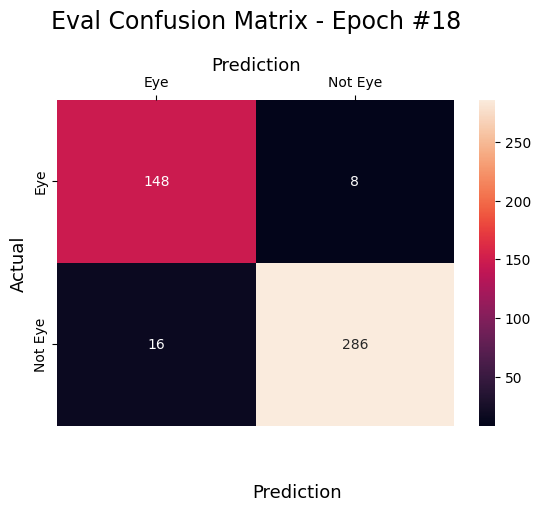

Epoch #19 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1479
           1       0.96      0.93      0.95      2185

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.93      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       156
           1       0.97      0.95      0.96       302

    accuracy                           0.95       458
   macro avg       0.94      0.95      0.94       458
weighted avg       0.95      0.95      0.95       458



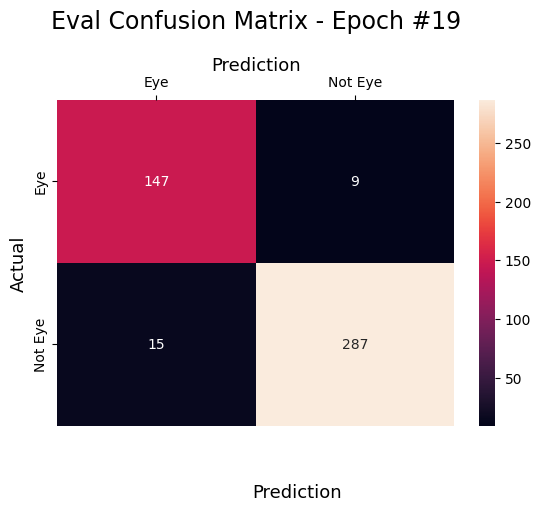

Epoch #20 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1479
           1       0.95      0.95      0.95      2185

    accuracy                           0.94      3664
   macro avg       0.94      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       156
           1       0.97      0.97      0.97       302

    accuracy                           0.96       458
   macro avg       0.96      0.96      0.96       458
weighted avg       0.96      0.96      0.96       458



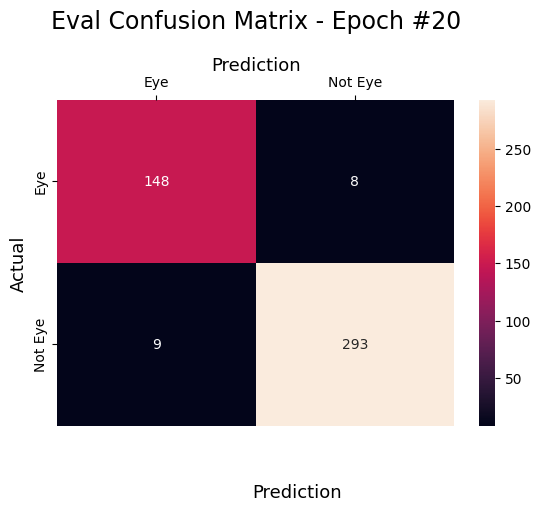

Epoch #21 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      1479
           1       0.97      0.91      0.94      2185

    accuracy                           0.93      3664
   macro avg       0.92      0.93      0.93      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       156
           1       0.98      0.96      0.97       302

    accuracy                           0.96       458
   macro avg       0.95      0.96      0.96       458
weighted avg       0.96      0.96      0.96       458



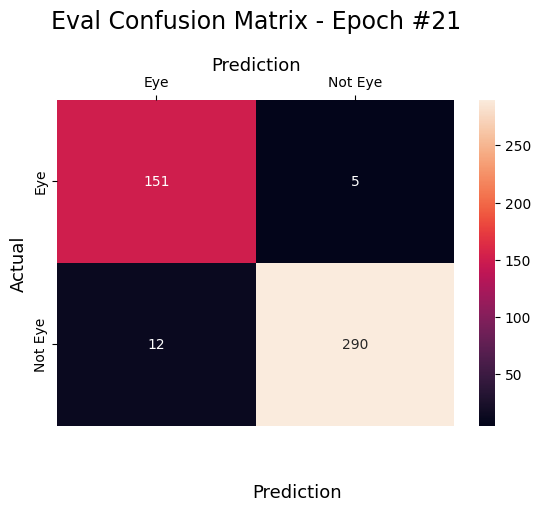

Epoch #22 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1479
           1       0.98      0.93      0.95      2185

    accuracy                           0.95      3664
   macro avg       0.94      0.95      0.94      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       156
           1       0.99      0.94      0.97       302

    accuracy                           0.96       458
   macro avg       0.94      0.96      0.95       458
weighted avg       0.96      0.96      0.96       458



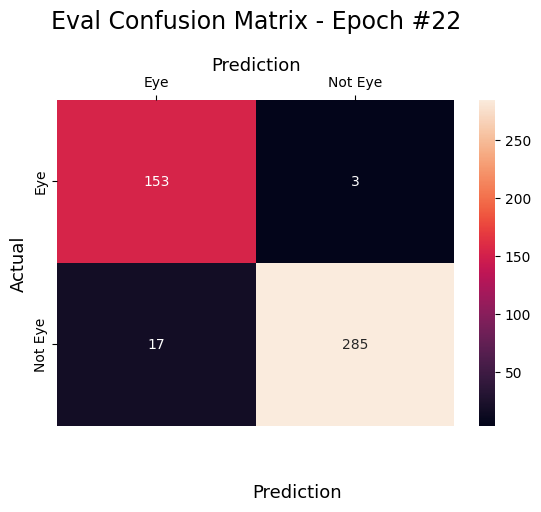

Epoch #23 
Training: 
               precision    recall  f1-score   support

           0       0.80      0.96      0.88      1479
           1       0.97      0.84      0.90      2185

    accuracy                           0.89      3664
   macro avg       0.89      0.90      0.89      3664
weighted avg       0.90      0.89      0.89      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       156
           1       0.98      0.91      0.95       302

    accuracy                           0.93       458
   macro avg       0.92      0.94      0.92       458
weighted avg       0.94      0.93      0.93       458



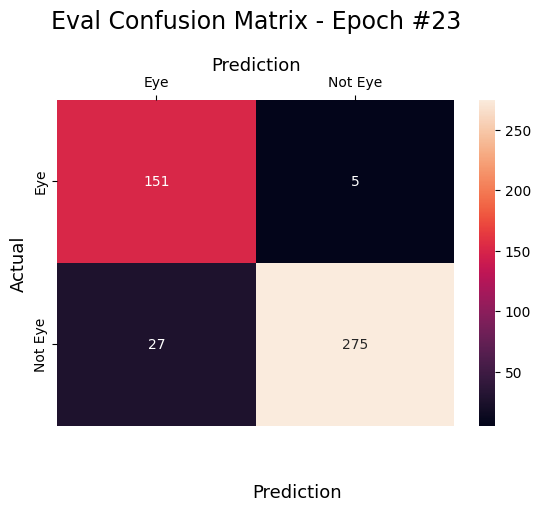

Epoch #24 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1479
           1       0.95      0.92      0.93      2185

    accuracy                           0.92      3664
   macro avg       0.91      0.92      0.92      3664
weighted avg       0.92      0.92      0.92      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.73      0.98      0.84       156
           1       0.99      0.81      0.89       302

    accuracy                           0.87       458
   macro avg       0.86      0.90      0.87       458
weighted avg       0.90      0.87      0.87       458



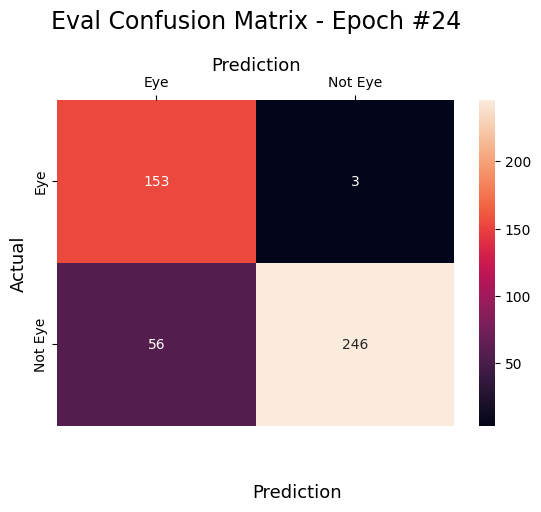

Epoch #25 
Training: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1479
           1       0.95      0.87      0.91      2185

    accuracy                           0.90      3664
   macro avg       0.89      0.91      0.90      3664
weighted avg       0.91      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       156
           1       0.98      0.85      0.91       302

    accuracy                           0.89       458
   macro avg       0.87      0.91      0.88       458
weighted avg       0.91      0.89      0.89       458



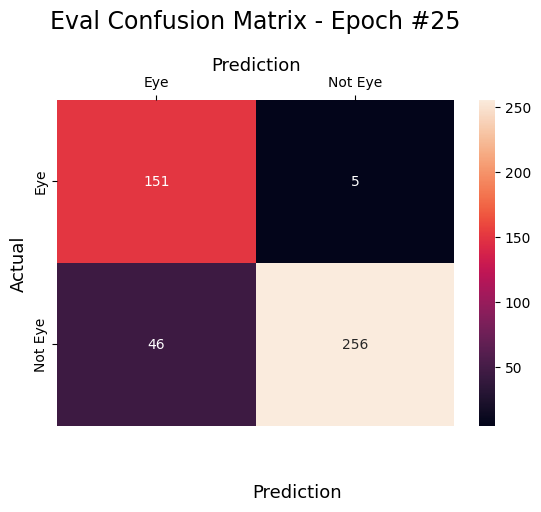

Epoch #26 
Training: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      1479
           1       0.96      0.86      0.91      2185

    accuracy                           0.89      3664
   macro avg       0.89      0.90      0.89      3664
weighted avg       0.90      0.89      0.89      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       156
           1       0.99      0.93      0.96       302

    accuracy                           0.95       458
   macro avg       0.93      0.95      0.94       458
weighted avg       0.95      0.95      0.95       458



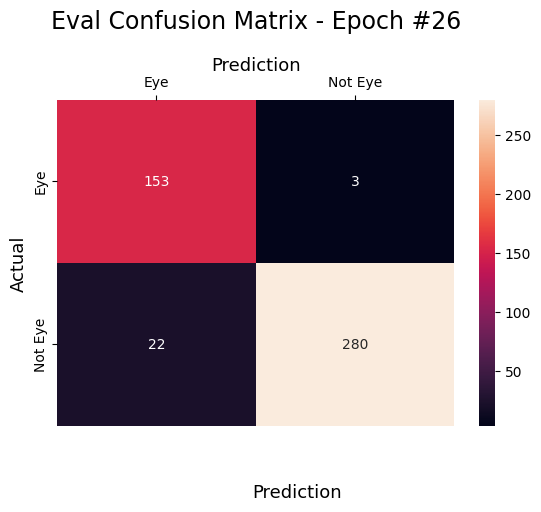

Epoch #27 
Training: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1479
           1       0.90      0.90      0.90      2185

    accuracy                           0.88      3664
   macro avg       0.88      0.88      0.88      3664
weighted avg       0.88      0.88      0.88      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       156
           1       0.99      0.89      0.94       302

    accuracy                           0.92       458
   macro avg       0.91      0.94      0.92       458
weighted avg       0.93      0.92      0.92       458



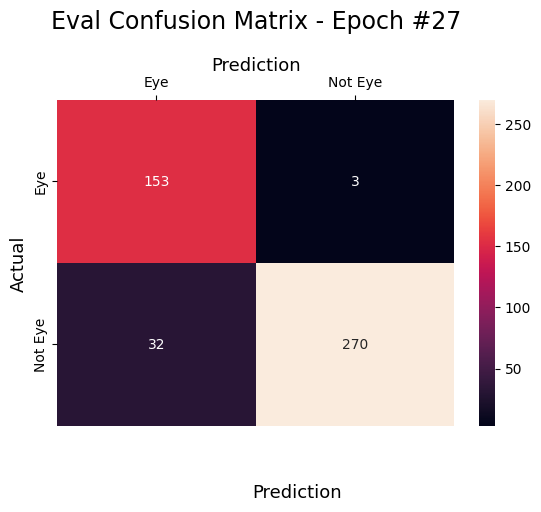

Epoch #28 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1479
           1       0.94      0.94      0.94      2185

    accuracy                           0.93      3664
   macro avg       0.93      0.93      0.93      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       156
           1       0.92      0.97      0.94       302

    accuracy                           0.92       458
   macro avg       0.93      0.90      0.91       458
weighted avg       0.92      0.92      0.92       458



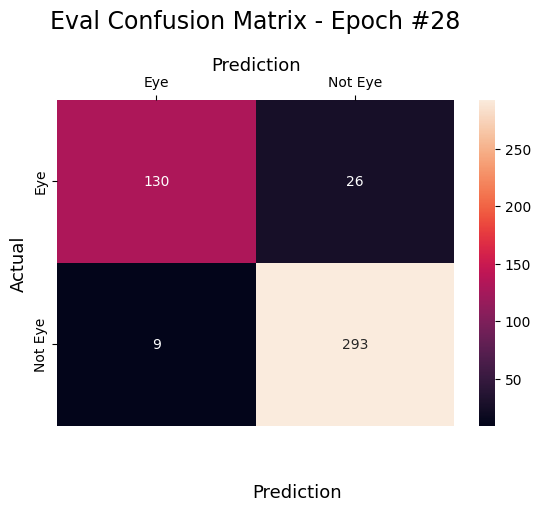

Epoch #29 
Training: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1479
           1       0.95      0.89      0.92      2185

    accuracy                           0.90      3664
   macro avg       0.90      0.91      0.90      3664
weighted avg       0.91      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       156
           1       1.00      0.86      0.93       302

    accuracy                           0.91       458
   macro avg       0.89      0.93      0.90       458
weighted avg       0.93      0.91      0.91       458



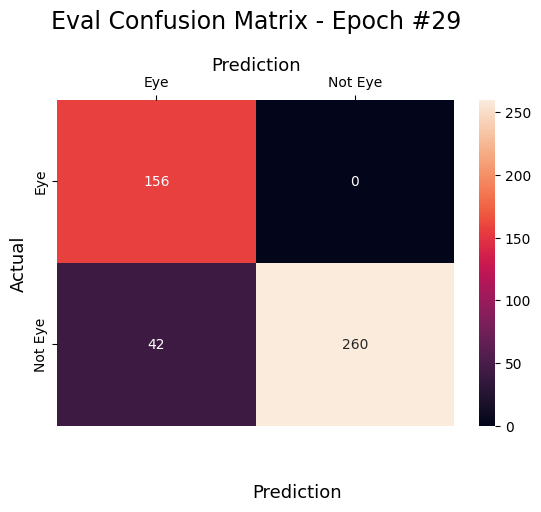

Epoch #30 
Training: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1479
           1       0.97      0.92      0.94      2185

    accuracy                           0.93      3664
   macro avg       0.93      0.94      0.93      3664
weighted avg       0.94      0.93      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       156
           1       0.98      0.95      0.97       302

    accuracy                           0.96       458
   macro avg       0.95      0.96      0.95       458
weighted avg       0.96      0.96      0.96       458



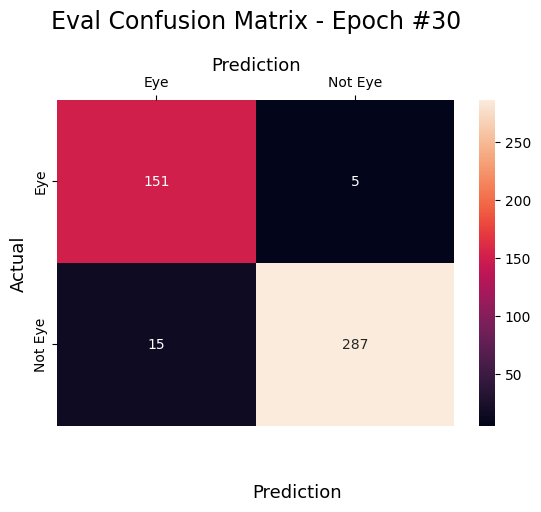

Epoch #31 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1479
           1       0.96      0.94      0.95      2185

    accuracy                           0.94      3664
   macro avg       0.94      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       156
           1       0.98      0.96      0.97       302

    accuracy                           0.96       458
   macro avg       0.96      0.96      0.96       458
weighted avg       0.96      0.96      0.96       458



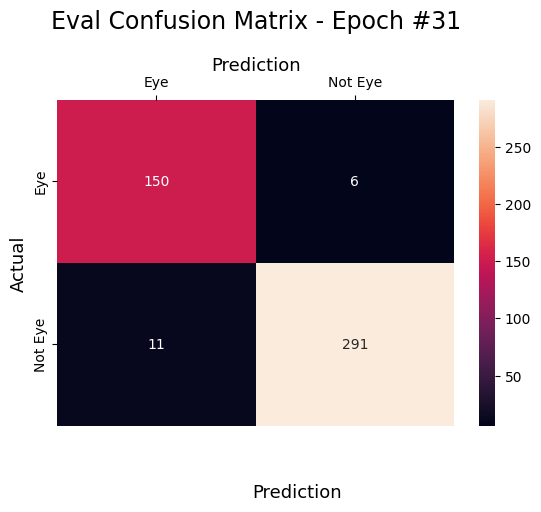

Epoch #32 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1479
           1       0.96      0.93      0.94      2185

    accuracy                           0.93      3664
   macro avg       0.93      0.93      0.93      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       156
           1       0.98      0.88      0.93       302

    accuracy                           0.91       458
   macro avg       0.89      0.92      0.90       458
weighted avg       0.92      0.91      0.91       458



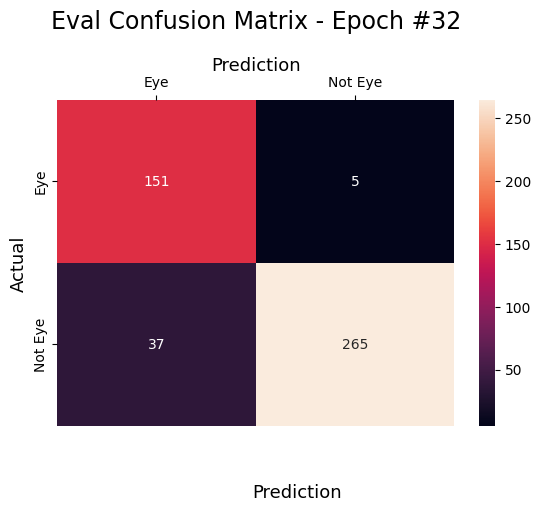

Epoch #33 
Training: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1479
           1       0.98      0.92      0.95      2185

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       156
           1       0.99      0.94      0.97       302

    accuracy                           0.96       458
   macro avg       0.94      0.96      0.95       458
weighted avg       0.96      0.96      0.96       458



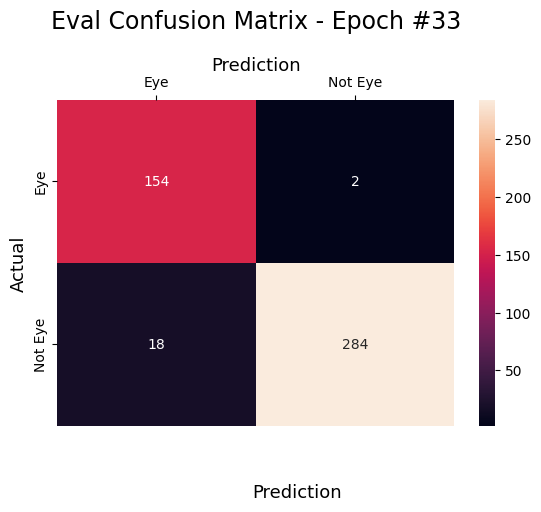

Epoch #34 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1479
           1       0.98      0.94      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.96      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       156
           1       1.00      0.93      0.96       302

    accuracy                           0.95       458
   macro avg       0.94      0.96      0.95       458
weighted avg       0.96      0.95      0.95       458



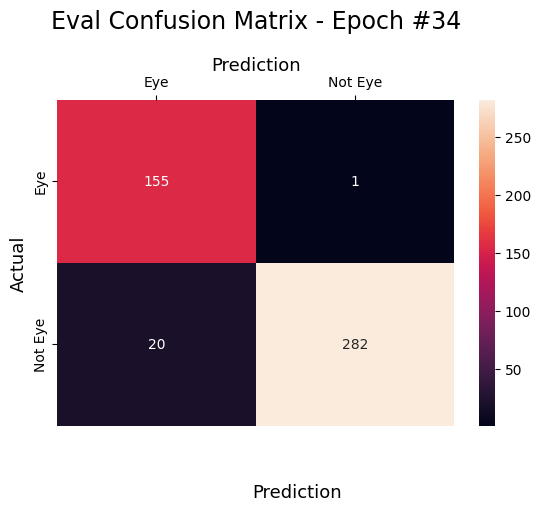

Epoch #35 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1479
           1       0.98      0.94      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.95      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       156
           1       0.99      0.97      0.98       302

    accuracy                           0.97       458
   macro avg       0.96      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



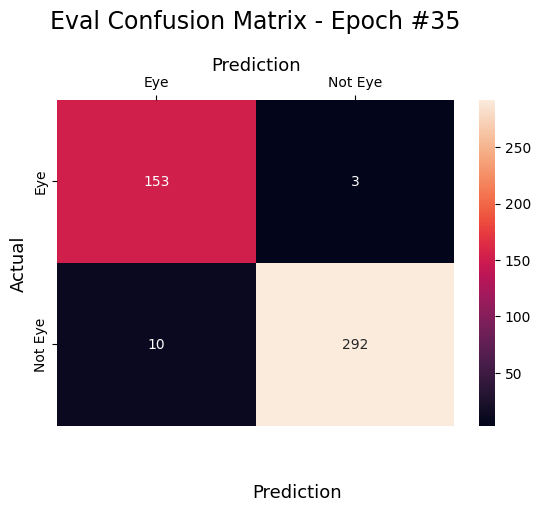

Epoch #36 
Training: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1479
           1       0.97      0.95      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.95      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       156
           1       1.00      0.95      0.97       302

    accuracy                           0.97       458
   macro avg       0.96      0.97      0.96       458
weighted avg       0.97      0.97      0.97       458



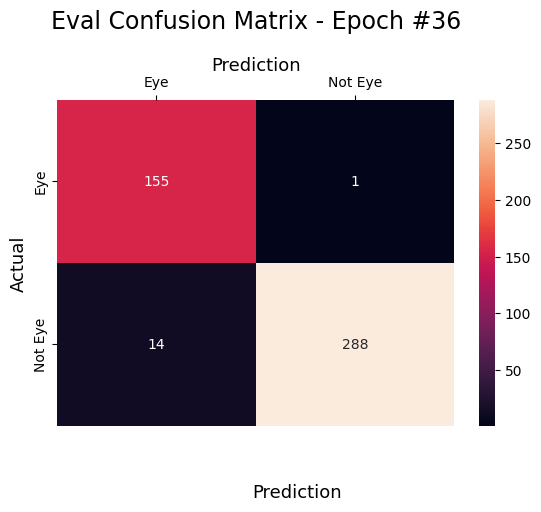

Epoch #37 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1479
           1       0.98      0.94      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.96      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       156
           1       1.00      0.96      0.98       302

    accuracy                           0.97       458
   macro avg       0.96      0.98      0.97       458
weighted avg       0.97      0.97      0.97       458



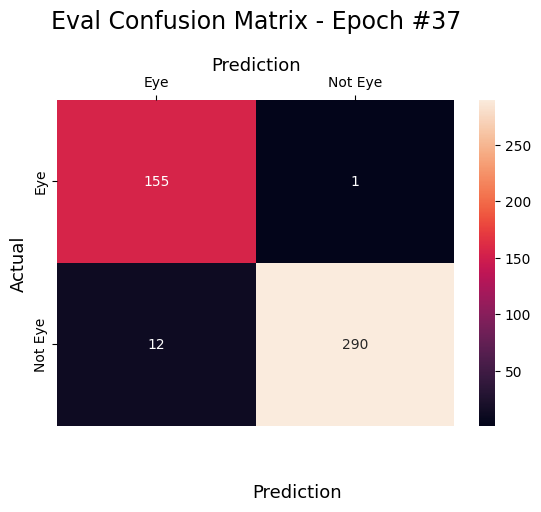

Epoch #38 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1479
           1       0.96      0.94      0.95      2185

    accuracy                           0.95      3664
   macro avg       0.94      0.95      0.94      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       156
           1       1.00      0.91      0.96       302

    accuracy                           0.94       458
   macro avg       0.93      0.96      0.94       458
weighted avg       0.95      0.94      0.94       458



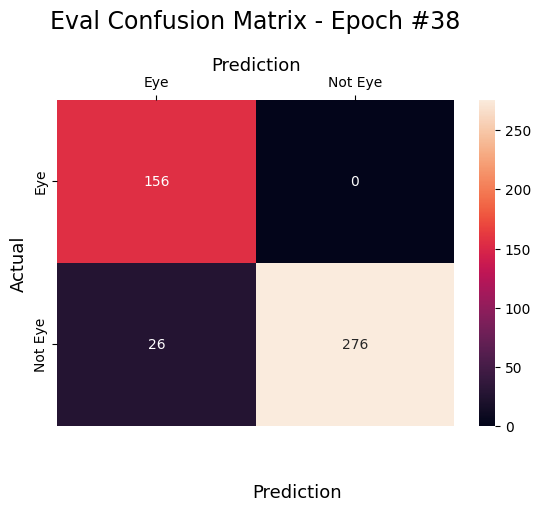

Epoch #39 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1479
           1       0.98      0.94      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.96      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       156
           1       1.00      0.96      0.98       302

    accuracy                           0.97       458
   macro avg       0.96      0.98      0.97       458
weighted avg       0.98      0.97      0.97       458



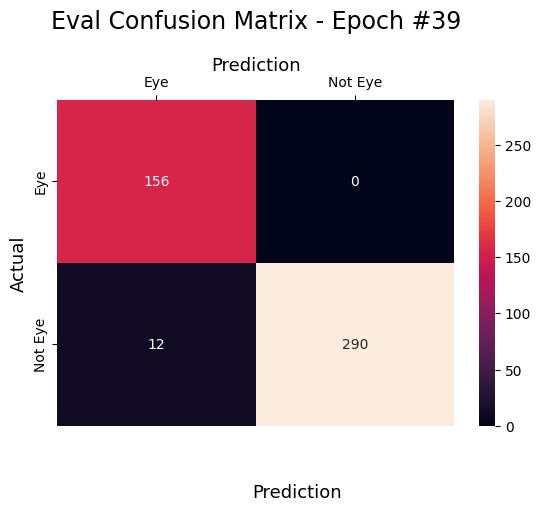

Epoch #40 
Training: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1479
           1       0.98      0.95      0.96      2185

    accuracy                           0.96      3664
   macro avg       0.95      0.96      0.96      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       156
           1       1.00      0.96      0.98       302

    accuracy                           0.98       458
   macro avg       0.97      0.98      0.97       458
weighted avg       0.98      0.98      0.98       458



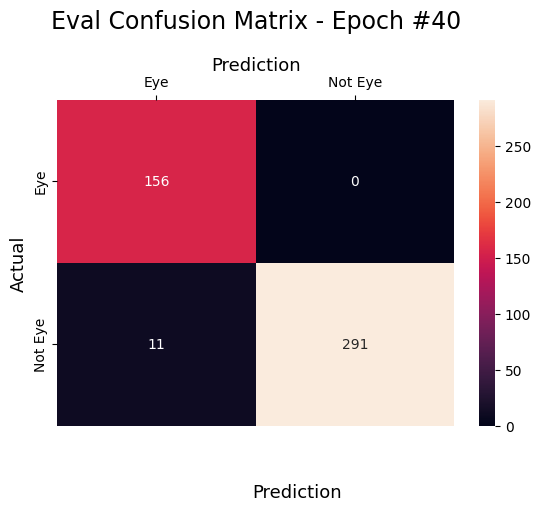

Epoch #41 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1479
           1       0.98      0.94      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.96      0.95      3664
weighted avg       0.96      0.95      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       156
           1       1.00      0.96      0.98       302

    accuracy                           0.97       458
   macro avg       0.96      0.98      0.97       458
weighted avg       0.97      0.97      0.97       458



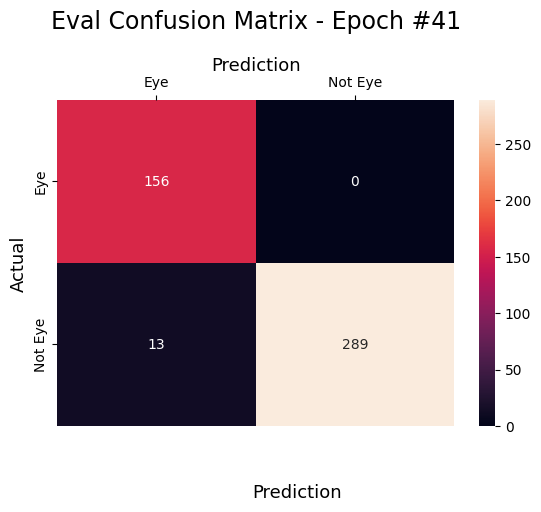

Epoch #42 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1479
           1       0.98      0.94      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.96      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       156
           1       1.00      0.94      0.97       302

    accuracy                           0.96       458
   macro avg       0.95      0.97      0.96       458
weighted avg       0.97      0.96      0.96       458



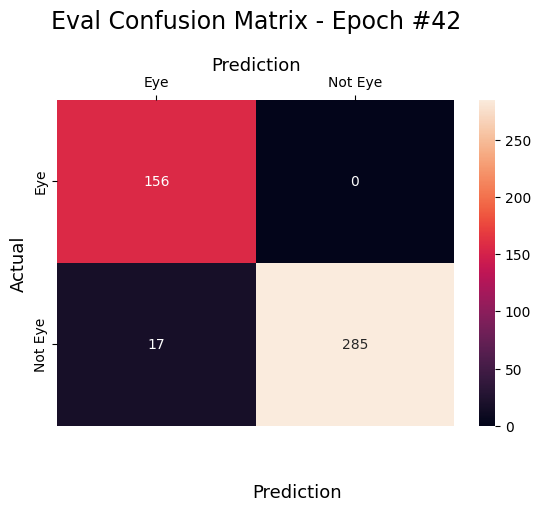

Epoch #43 
Training: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1479
           1       0.98      0.95      0.97      2185

    accuracy                           0.96      3664
   macro avg       0.96      0.96      0.96      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       156
           1       0.99      0.98      0.98       302

    accuracy                           0.98       458
   macro avg       0.97      0.98      0.98       458
weighted avg       0.98      0.98      0.98       458



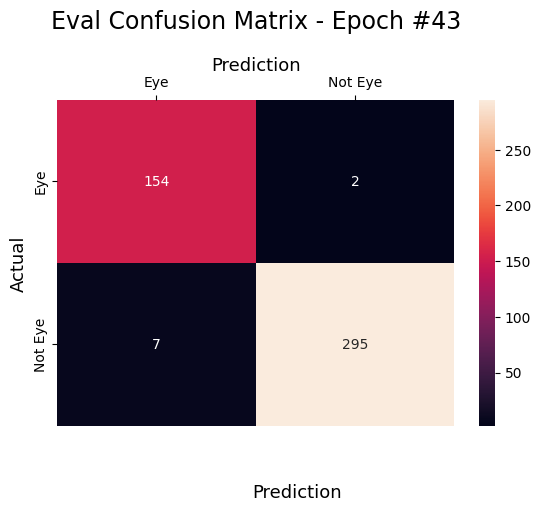

Epoch #44 
Training: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1479
           1       0.98      0.95      0.97      2185

    accuracy                           0.96      3664
   macro avg       0.96      0.96      0.96      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       156
           1       1.00      0.95      0.97       302

    accuracy                           0.97       458
   macro avg       0.95      0.97      0.96       458
weighted avg       0.97      0.97      0.97       458



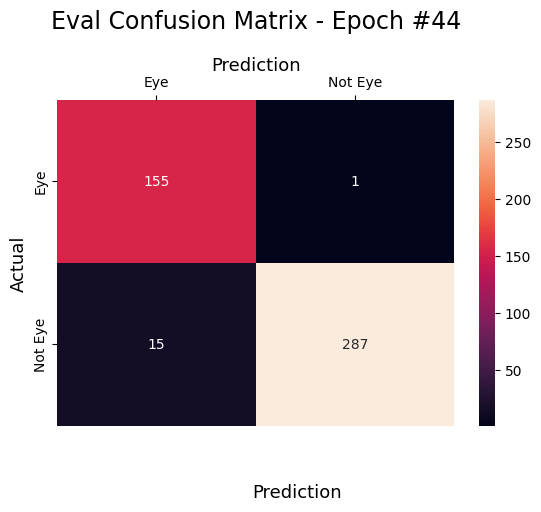

Epoch #45 
Training: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1479
           1       0.98      0.95      0.97      2185

    accuracy                           0.96      3664
   macro avg       0.96      0.96      0.96      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       156
           1       1.00      0.96      0.98       302

    accuracy                           0.97       458
   macro avg       0.97      0.98      0.97       458
weighted avg       0.98      0.97      0.97       458



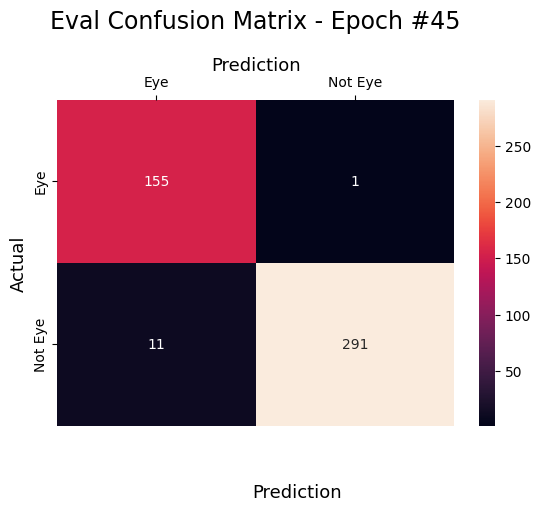

Epoch #46 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1479
           1       0.98      0.94      0.96      2185

    accuracy                           0.96      3664
   macro avg       0.95      0.96      0.95      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       156
           1       0.99      0.97      0.98       302

    accuracy                           0.98       458
   macro avg       0.97      0.98      0.97       458
weighted avg       0.98      0.98      0.98       458



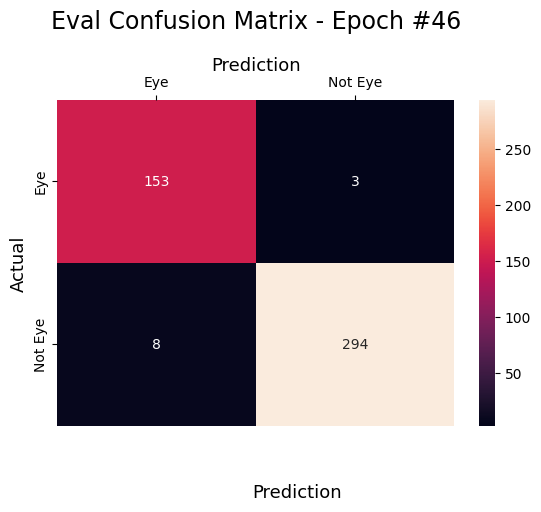

Epoch #47 
Training: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1479
           1       0.98      0.96      0.97      2185

    accuracy                           0.96      3664
   macro avg       0.96      0.96      0.96      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       156
           1       0.99      0.96      0.98       302

    accuracy                           0.97       458
   macro avg       0.96      0.98      0.97       458
weighted avg       0.97      0.97      0.97       458



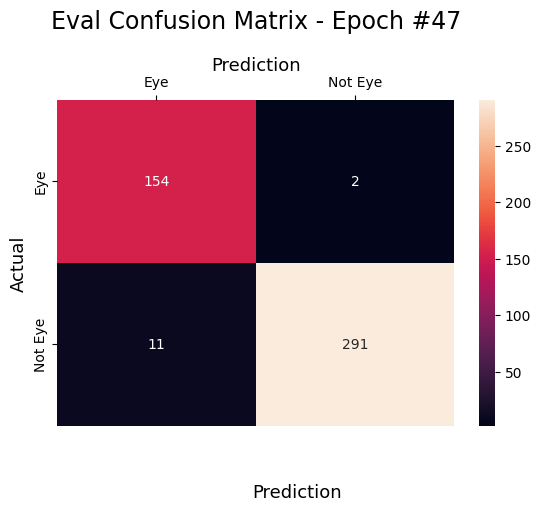

Epoch #48 
Training: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1479
           1       0.98      0.96      0.97      2185

    accuracy                           0.96      3664
   macro avg       0.96      0.96      0.96      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       156
           1       0.99      0.96      0.97       302

    accuracy                           0.97       458
   macro avg       0.96      0.97      0.96       458
weighted avg       0.97      0.97      0.97       458



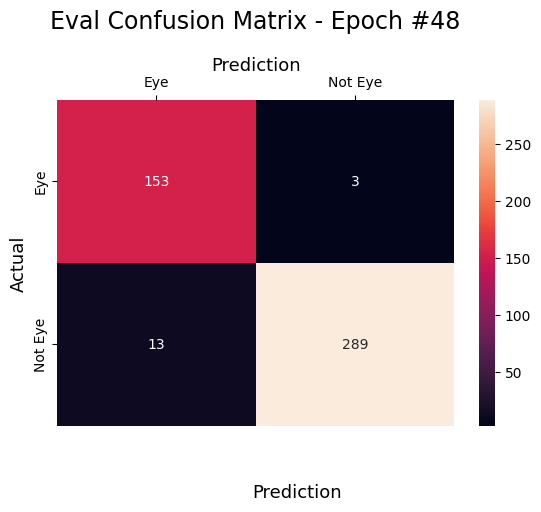

Epoch #49 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1479
           1       0.99      0.94      0.97      2185

    accuracy                           0.96      3664
   macro avg       0.96      0.96      0.96      3664
weighted avg       0.96      0.96      0.96      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       156
           1       0.98      0.97      0.98       302

    accuracy                           0.97       458
   macro avg       0.96      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



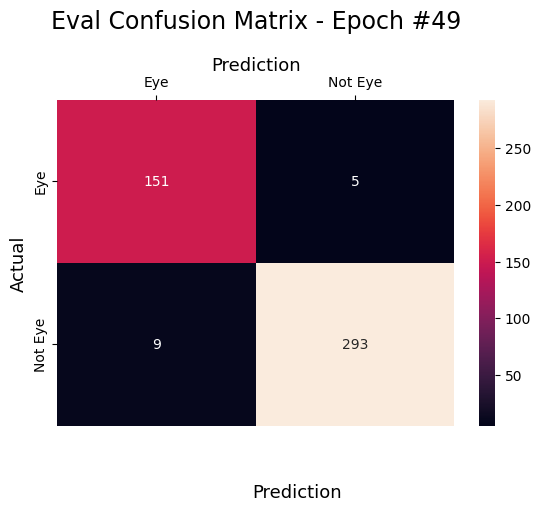

Epoch #50 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1479
           1       0.98      0.93      0.96      2185

    accuracy                           0.95      3664
   macro avg       0.95      0.95      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.99      0.97      0.98       302

    accuracy                           0.97       458
   macro avg       0.97      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



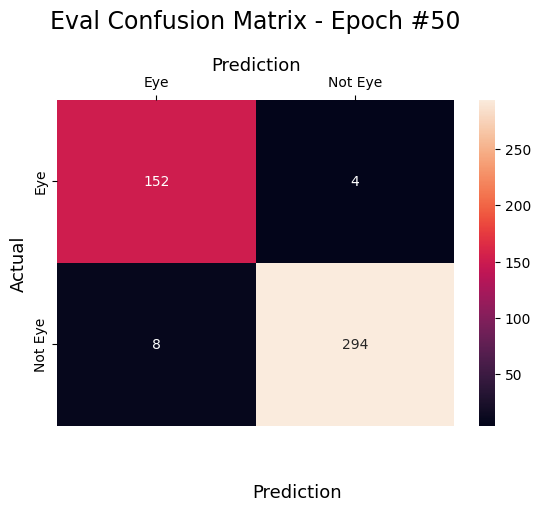

In [14]:
num_epochs = 50

for i in range(num_epochs):
    
    print(f"Epoch #{i+1} ")
    
    train_actual, train_predicted = model_train(model, optimizer, criterion, train_loader)
    eval_actual, eval_predicted = model_eval(model, criterion, val_loader)
    
    print("Training: \n", classification_report(train_actual, train_predicted))
    print("Evaluation: \n", classification_report(eval_actual, eval_predicted))
    create_confusion_matrix(eval_actual, eval_predicted, i)
    

In [15]:
torch.seed()


766935263023100

In [16]:
#torch.save(model, "models_info/validation_model_3.pth")